In [1]:
import numpy as np
import scipy as sp
import scipy.special
import matplotlib.pyplot as plt
import mpmath as mp
from mpmath import hyp1f1
import KGInt as kg

%matplotlib inline

In [2]:
makefloat = np.frompyfunc(float,1,1)
F         = np.frompyfunc(hyp1f1, 3,1)
goreal    = np.frompyfunc(lambda a: a.real, 1,1)
goimag    = np.frompyfunc(lambda a: a.imag, 1,1)

In [116]:
#plot hypergeometric
#hypgeom from mathmp package
def plot(A, kr, eta, label=""):
    y = np.linspace(-1,1, len(A))
    v=makefloat(goreal(A))
    plt.figure(0,(14,7))
    plt.xlabel("y", fontsize=14)
    if len(label)>0:
        plt.ylabel(label)
    else:
        plt.ylabel( r'${}_{1}F_1(1+i%.2f, 1, i %.1f (1+y)$'%(eta,kr), fontsize=14)
    plt.plot(y,v)
    
def diff(A1, A2, kr, eta,nolog=False):
    y = np.linspace(-1,1, len(A1))
    plt.figure(0,(14,7))
    if not nolog:
        plt.yscale("log")
    plt.xlabel("y", fontsize=18)
    plt.ylabel( r'|my impl. - mpmath|, eta=%.2f, kr=%.1f'%(eta,kr), fontsize=18)
    plt.plot(y,abs(A1-A2))

## Plot hypergeometric from mpmath

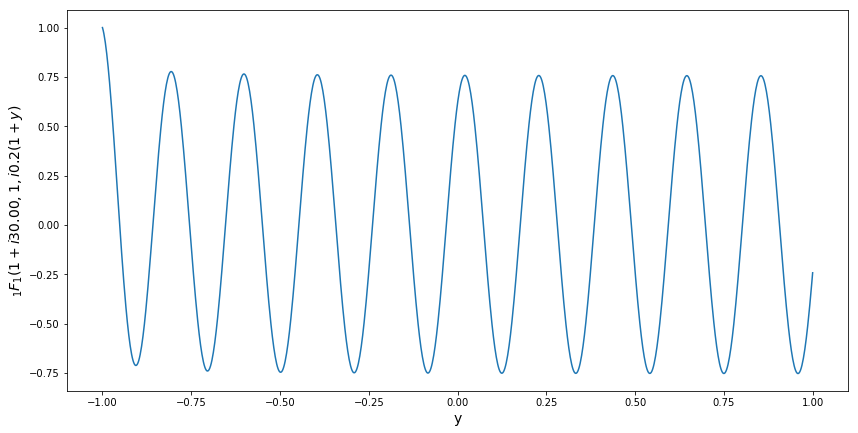

In [102]:
eta=0.2
kr=30
y=np.linspace(-1,1,1000)
A=F(1+1j*eta, 1, 1j*kr*(1+y))
plot(A,eta,kr)

## Plot hypergeometric from my package

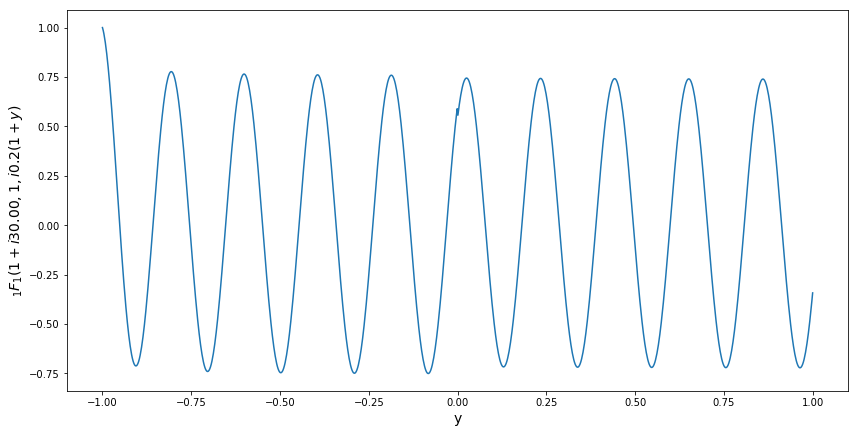

In [103]:
eta=0.2
kr=30
N=1000
y=np.linspace(-1,1,N)
A = kg.hyp1f1y(N, 30, 0.2, 1e-8)
plot(A,eta,kr)

## diff

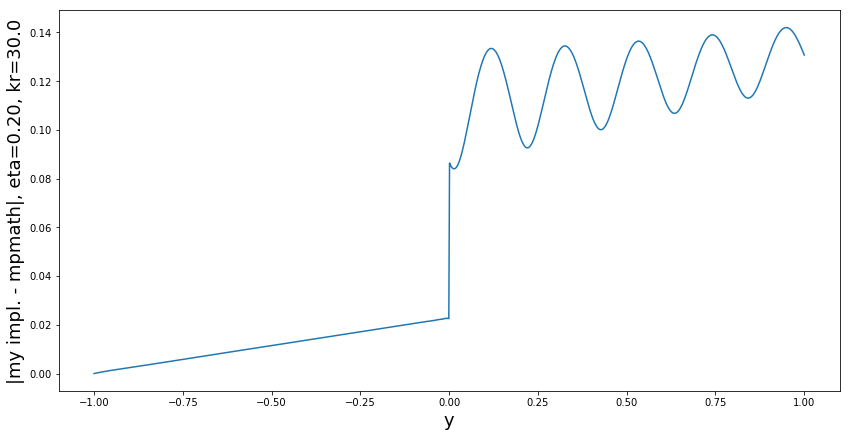

In [125]:
eta=0.2
kr=30
y = np.linspace(-1,1, 1000)
A1 = F(1+1j*eta, 1, 1j*kr*(1+y))
A2 = kg.hyp1f1y(len(y), kr, eta, 1e-8)
diff(A1,A2,kr,eta,True)

# F(F+F)

In [105]:
def FFF(y, kr, eta):
    return F(1+1j*eta, 1, -1j*kr*(1-y))*(F(1-1j*eta, 1, 1j*kr*(1-y))+F(1-1j*eta, 1, 1j*kr*(1+y)))

## mpmath

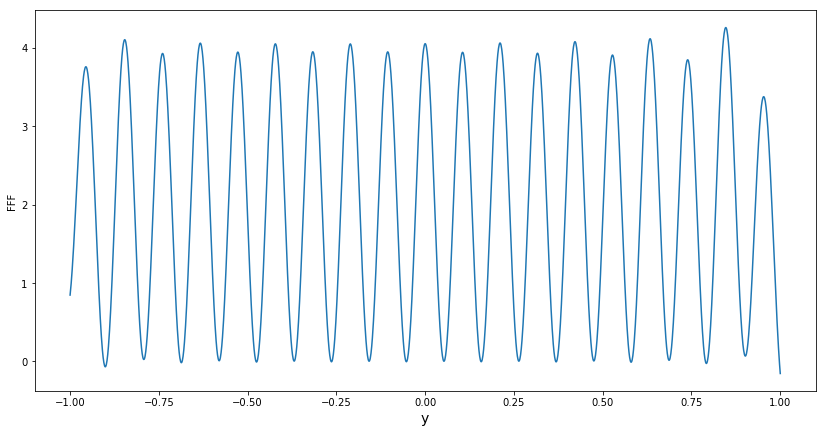

In [113]:
eta=0.2
kr=30
y = np.linspace(-1,1, 2000)
plot(FFF(y,kr,eta),kr,eta, label="FFF")

## my

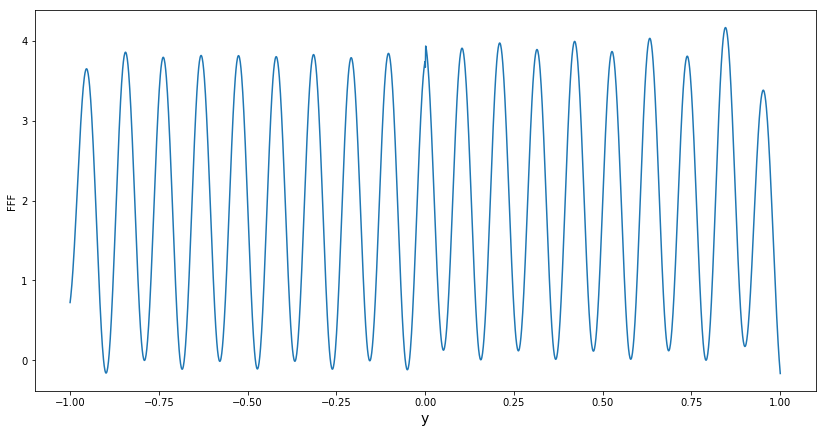

In [114]:
eta=0.2
kr=30
plot(kg.hyp1f1_FFF(2000, kr, eta, 1e-8),kr,eta, label="FFF")

## diff

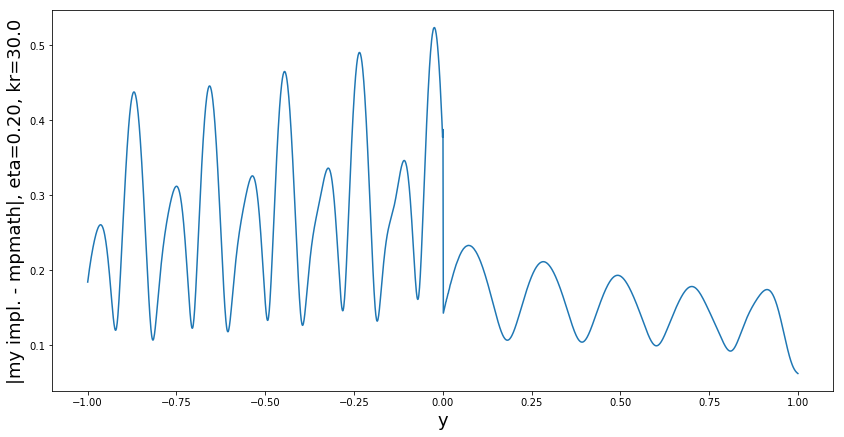

In [131]:
eta=0.2
kr=30
y = np.linspace(-1,1, 2000)
A1 = F(1+1j*eta, 1, -1j*kr*(1-y))*(F(1-1j*eta, 1, 1j*kr*(1-y))+F(1-1j*eta, 1, 1j*kr*(1+y)))
A2 = kg.hyp1f1_FFF(len(y), kr, eta, 1e-8)
diff(A1,A2,kr,eta, True)

# ------------------------------------------------------------------

\begin{equation}
\eta = \frac{\mu\alpha}{2k}=\frac{m_\pi\alpha}{4k}
\end{equation}

$k=xm_\pi$
\begin{equation}
\eta = \frac{\mu\alpha}{2k}=\frac{m_\pi\alpha}{4k}=\frac{\alpha}{4x}
\end{equation}

In [4]:
%%com
eta=0.25
x = alpha

eta = 1e-5

x = alpha*1e+5/4

alpha=1
x=np.linspace(1e-4, 0.25, 1000)
eta = alpha/(4*x)
plt.yscale("log")
plt.plot(x,eta)

ERROR:root:Cell magic `%%com` not found.
